In [129]:
import os
import numpy as np
import mne
mne.set_log_level('error')
import matplotlib.pyplot as plt
from functions_v2 import *

In [130]:
subject = "P019"
run = "005"
data_dir = f"./{subject}/"
ica_path =  f"./ICA/{subject}"

epoch = 1

# Placebo
p_id_placebo = f"sub-{subject}_ses-S001_task-Default_run-{run}"
file_placebo = data_dir  + p_id_placebo + "_eeg-filt-raw-annotated.fif"
raw_placebo = mne.io.read_raw_fif(file_placebo, preload=True)
ica_placebo = mne.preprocessing.read_ica(ica_path + '/' + p_id_placebo + '-ica.fif');

# Alcohol
p_id_alcohol = f"sub-{subject}_ses-S002_task-Default_run-{run}"
file_alcohol = data_dir  + p_id_alcohol + "_eeg-filt-raw-annotated.fif"
raw_alcohol = mne.io.read_raw_fif(file_alcohol, preload=True)
ica_alcohol = mne.preprocessing.read_ica(ica_path + '/' + p_id_alcohol + '-ica.fif');


event_dict = {
    #"Congruent" : 50, #"Congruent stimulus presented" 
    "Incongruent" : 51, #"Incongruent stimulus presented"
}

### Epochs

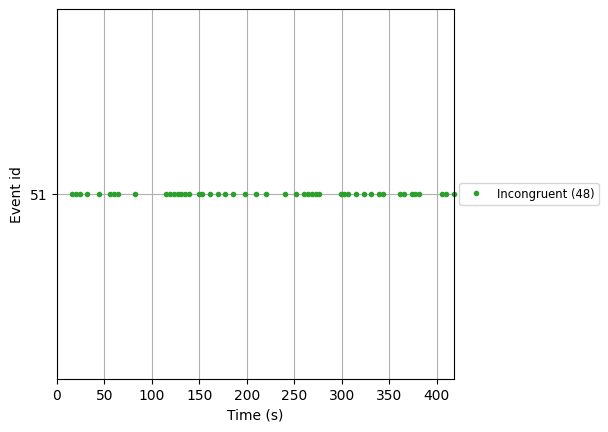

Epoch 0 starts at 365.316 seconds in the raw data.
Epoch 1 starts at 377.432 seconds in the raw data.
Epoch 2 starts at 405.704 seconds in the raw data.
Epoch 3 starts at 409.74 seconds in the raw data.
{'Delta': [2.5386141991008856e-09], 'Theta': [1.0513375746857297e-09], 'Alpha': [2.803817626553736e-10], 'Beta': [1.1069137577641471e-10], 'Gamma': [4.65522475393154e-11]}
377.432


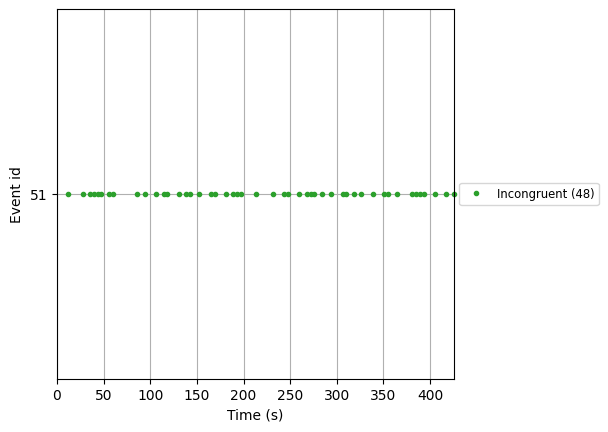

Epoch 0 starts at 94.212 seconds in the raw data.
Epoch 1 starts at 114.396 seconds in the raw data.
Epoch 2 starts at 118.436 seconds in the raw data.
Epoch 3 starts at 189.08 seconds in the raw data.
Epoch 4 starts at 306.148 seconds in the raw data.
{'Delta': [1.6596871912252335e-09], 'Theta': [7.696131257967157e-10], 'Alpha': [3.4044999254257216e-10], 'Beta': [1.227192881562868e-10], 'Gamma': [3.0834168090914065e-11]}


In [131]:
## Placebo
epochs_placebo, event_times_placebo = ERP(raw_placebo, event_dict)
# epochs_placebo.plot()
epochs_placebo = ica_placebo.apply(epochs_placebo.copy())
print(freq_band_power(epochs_placebo))

# epochs_placebo.plot()
epoch_placebo_idx = epoch
epoch_placebo = epochs_placebo[epoch_placebo_idx]
print(event_times_placebo[epoch_placebo_idx])

## Alcohol
epochs_alcohol, event_times_alcohol = ERP(raw_alcohol, event_dict)
# epochs_alcohol.plot()
epochs_alcohol = ica_alcohol.apply(epochs_alcohol.copy())
# epochs_alcohol.plot()
print(freq_band_power(epochs_alcohol))
epoch_alcohol_idx = epoch
epoch_alcohol = epochs_alcohol[epoch_alcohol_idx]
# epoch_alcohol.plot();
# epochs_alcohol.average().plot();

### Extracting signals

In [132]:
channels = ['PO8', 'Fp1']
event_start_line = True

placebo_picks = mne.pick_channels(ch_names = raw_placebo.info['ch_names'], include=channels)
p_data, p_time = raw_placebo[placebo_picks, :]  

alcohol_picks = mne.pick_channels(ch_names = raw_alcohol.info['ch_names'], include=channels)
a_data, a_time = raw_alcohol[alcohol_picks, :]  

channel_nr = 1

sample_rate = raw_placebo.info['sfreq']
window_size = 0.8

s1_placebo = event_times_placebo[epoch_placebo_idx]
s2_placebo = s1_placebo + window_size
p_delta1 = int(sample_rate*s1_placebo)
p_delta2 = int(sample_rate*s2_placebo)

p_d0 = p_data[0][p_delta1:p_delta2]
p_d1 = p_data[1][p_delta1:p_delta2]


s1_alcohol = event_times_alcohol[epoch_alcohol_idx]
s2_alcohol = s1_alcohol + window_size
a_delta1 = int(sample_rate*s1_alcohol)
a_delta2 = int(sample_rate*s2_alcohol)

a_d0 = a_data[0][a_delta1:a_delta2]
a_d1 = a_data[1][a_delta1:a_delta2]

num_samples = len(p_d0)
t = np.linspace(-0.2, 0.6, num_samples)

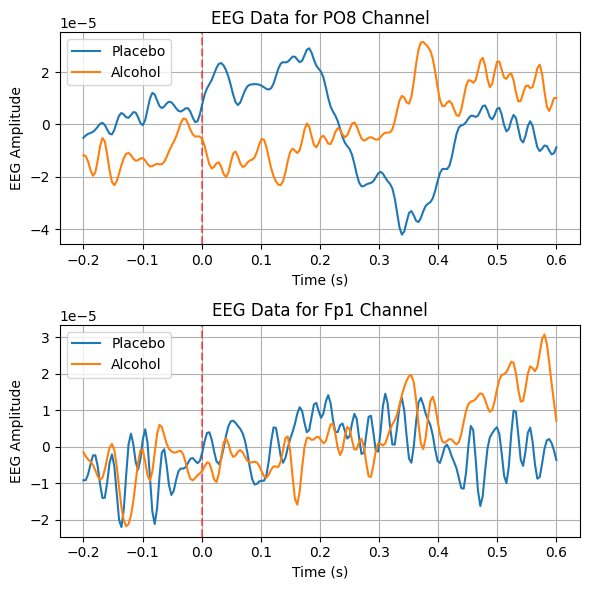

In [133]:
plt.figure(figsize=(6, 6))
plt.subplot(211)
if event_start_line:
    plt.axvline(x = 0, color = 'r', linestyle='dashed',alpha=0.55)
plt.plot(t, p_d0, label="Placebo")
plt.plot(t, a_d0, label="Alcohol")
plt.xlabel('Time (s)')
plt.ylabel('EEG Amplitude')
plt.legend()
plt.title(f'EEG Data for {channels[0]} Channel')
plt.grid(True)

plt.subplot(212)
if event_start_line:
    plt.axvline(x = 0, color = 'r', linestyle='dashed',alpha=0.55)
plt.plot(t, p_d1, label="Placebo")
plt.plot(t, a_d1, label="Alcohol")
plt.xlabel('Time (s)')
plt.ylabel('EEG Amplitude')
plt.legend()
plt.title(f'EEG Data for {channels[1]} Channel')
plt.grid(True)

plt.tight_layout()
plt.show()

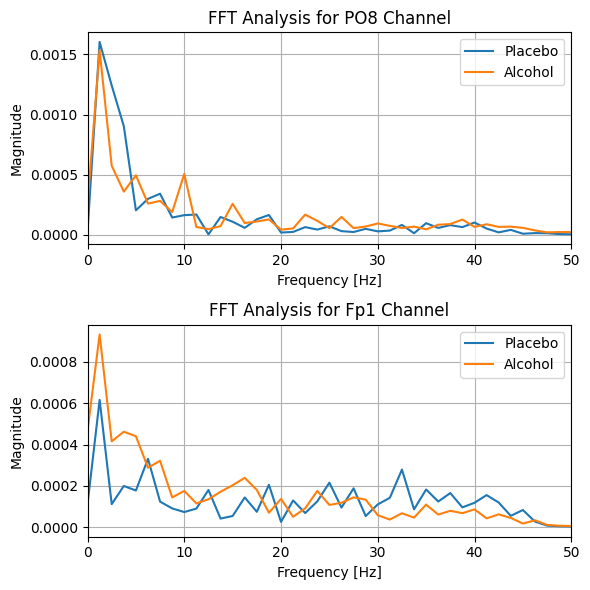

In [134]:
from matplotlib.ticker import StrMethodFormatter

freq_p_d0, fft_p_d0 = rfft(p_d0, num_samples, sample_rate)
freq_a_d0, fft_a_d0 = rfft(a_d0, num_samples, sample_rate)
freq_p_d1, fft_p_d1 = rfft(p_d1, num_samples, sample_rate)
freq_a_d1, fft_a_d1 = rfft(a_d1, num_samples, sample_rate)


plt.figure(figsize=(6, 6))
plt.subplot(211)
plt.plot(freq_p_d0, fft_p_d0, label="Placebo")
plt.plot(freq_a_d0, fft_a_d0, label="Alcohol")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.legend()
plt.xlim(0, 50)
# plt.ylim(0, 0.0018)
plt.title(f'FFT Analysis for {channels[0]} Channel')
plt.grid(True)

plt.subplot(212)
plt.plot(freq_p_d1, fft_p_d1, label="Placebo")
plt.plot(freq_a_d1, fft_a_d1, label="Alcohol")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, 50)
# plt.ylim(0, 0.0018)
plt.legend()
plt.title(f'FFT Analysis for {channels[1]} Channel')
plt.grid(True)

plt.tight_layout()
plt.show()

### Extracting IMFS using CEEMDAN

In [135]:
if os.path.exists(f"imfs/{subject}/cimfs0_placebo_{epoch}.npy") and \
    os.path.exists(f"imfs/{subject}/cimfs0_alcohol_{epoch}.npy"):
    with open(f'imfs/{subject}/cimfs0_placebo_{epoch}.npy', 'rb') as f:
        p_cimfs0 = np.load(f)
    with open(f'imfs/{subject}/cimfs0_alcohol_{epoch}.npy', 'rb') as f:
        a_cimfs0 = np.load(f)
else:
    if not os.path.exists(f"imfs/{subject}/"):
        os.mkdir(f"imfs/{subject}/")
    p_cimfs0 = ceemdan(t, p_d0, trials=2000, noise_width=0.1, plot=False)
    with open(f'imfs/{subject}/cimfs0_placebo_{epoch}.npy', 'wb') as f:
        np.save(f, p_cimfs0)
    a_cimfs0 = ceemdan(t, a_d0, trials=2000, noise_width=0.1, plot=False)
    with open(f'imfs/{subject}/cimfs0_alcohol_{epoch}.npy', 'wb') as f:
        np.save(f, a_cimfs0)


if os.path.exists(f"imfs/{subject}/cimfs1_placebo_{epoch}.npy") and \
    os.path.exists(f"imfs/{subject}/cimfs1_alcohol_{epoch}.npy"):
    with open(f'imfs/{subject}/cimfs1_placebo_{epoch}.npy', 'rb') as f:
        p_cimfs1 = np.load(f)
    with open(f'imfs/{subject}/cimfs1_alcohol_{epoch}.npy', 'rb') as f:
        a_cimfs1 = np.load(f)
else:
    if not os.path.exists(f"imfs/{subject}/"):
        os.mkdir(f"imfs/{subject}/")
    p_cimfs1 = ceemdan(t, p_d1, trials=2000, noise_width=0.1, plot=False)
    with open(f'imfs/{subject}/cimfs1_placebo_{epoch}.npy', 'wb') as f:
        np.save(f, p_cimfs1)
    a_cimfs1 = ceemdan(t, a_d1, trials=2000, noise_width=0.1, plot=False)
    with open(f'imfs/{subject}/cimfs1_alcohol_{epoch}.npy', 'wb') as f:
        np.save(f, a_cimfs1)

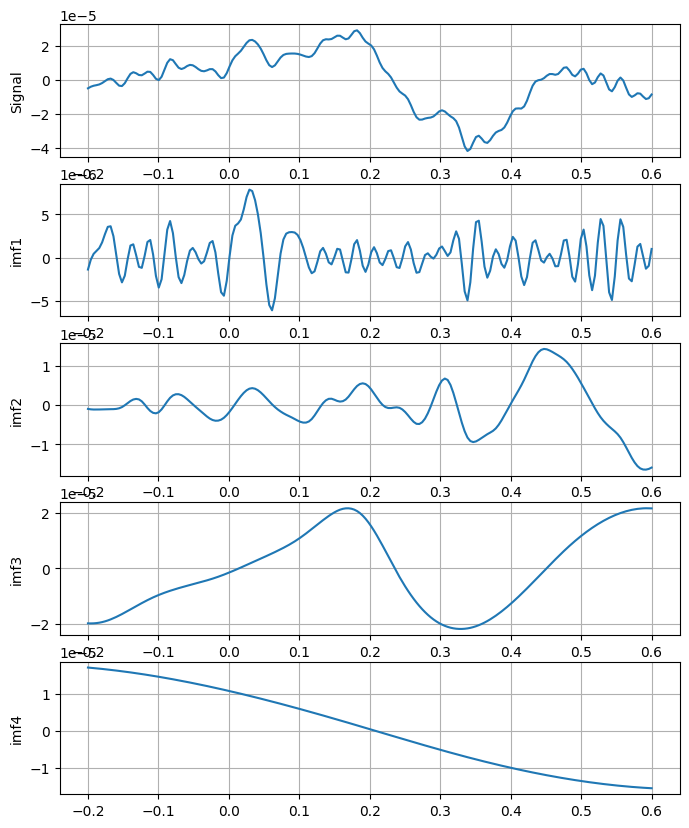

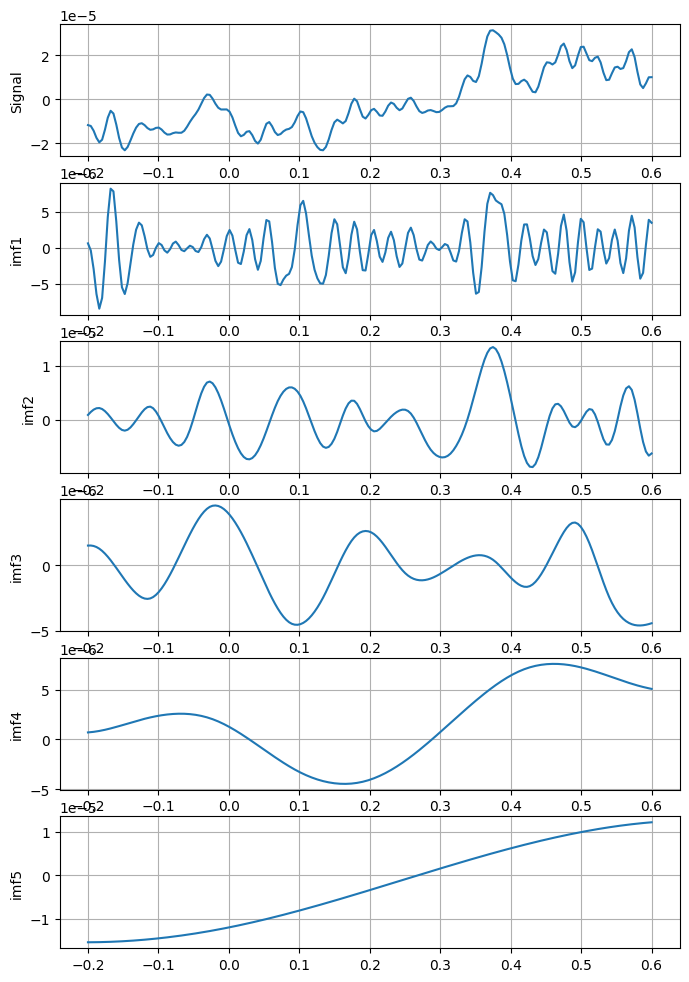

In [136]:
plot_imfs(p_cimfs0, t, p_d0)
plot_imfs(a_cimfs0, t, a_d0)

In [137]:
# plot_imfs(p_cimfs1, t, p_d1)
# plot_imfs(a_cimfs1, t, a_d1)

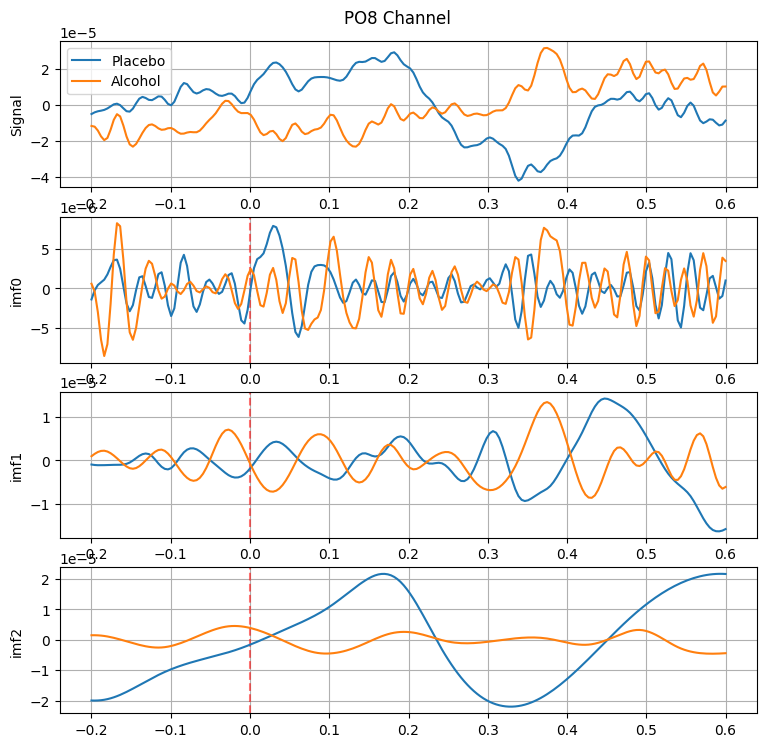

In [138]:
plot_imfs_together(p_cimfs0, a_cimfs0, t, p_d0, a_d0, [0, 1, 2], channel=channels[0])

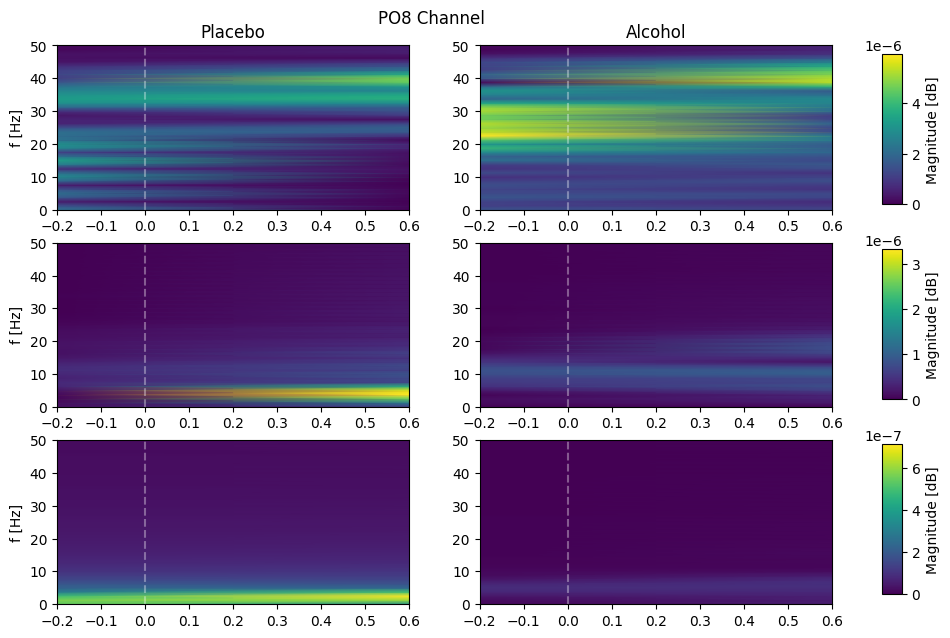

In [139]:
plot_stft_imfs(sample_rate, p_cimfs0, a_cimfs0, t, p_d0, a_d0, [0, 1, 2], [0, 1, 2], channels[0])

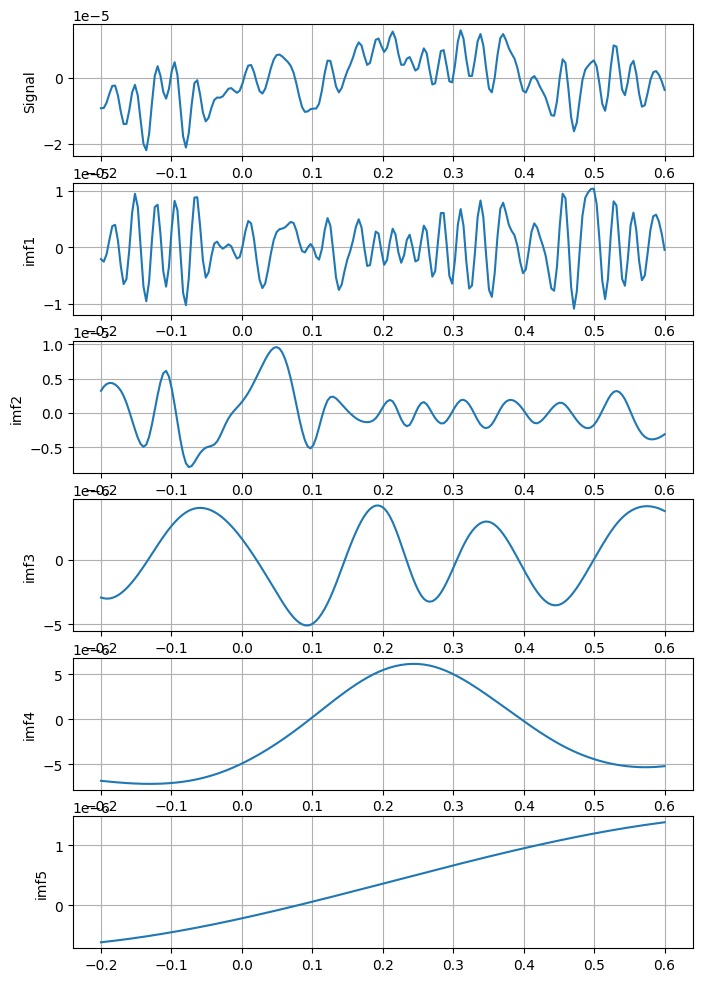

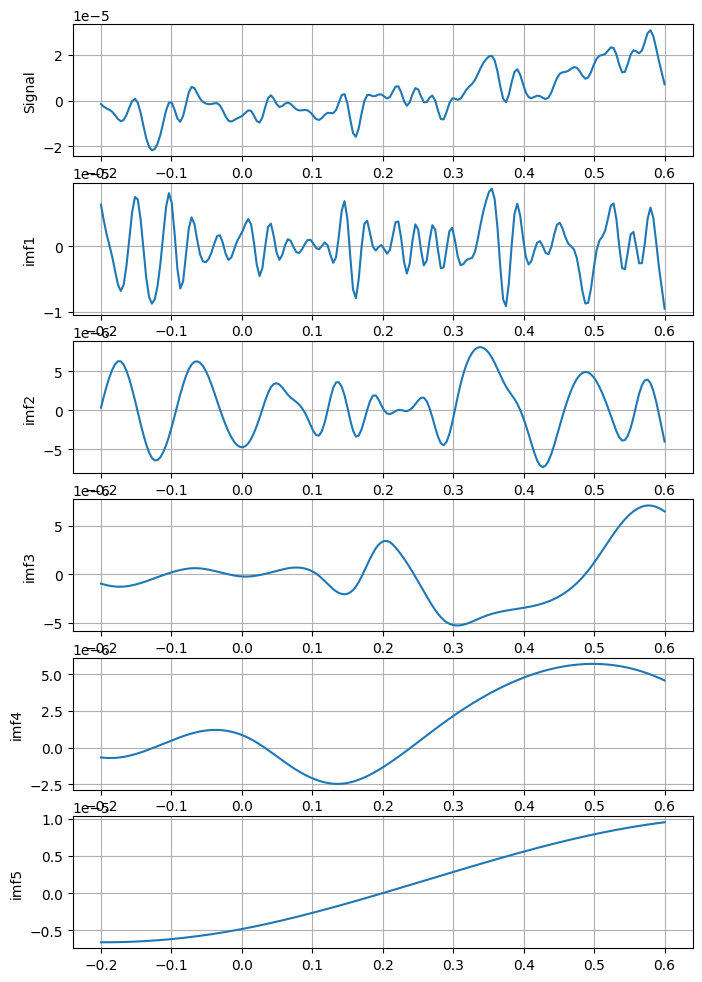

In [140]:
plot_imfs(p_cimfs1, t, p_d1)
plot_imfs(a_cimfs1, t, a_d1)

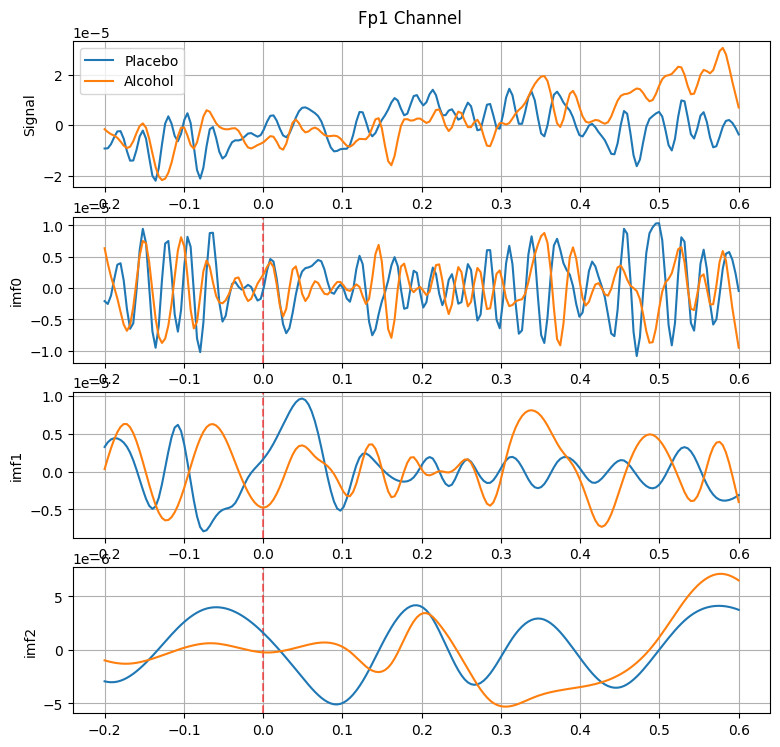

In [141]:
plot_imfs_together(p_cimfs1, a_cimfs1, t, p_d1, a_d1, [0, 1, 2], channel=channels[1])

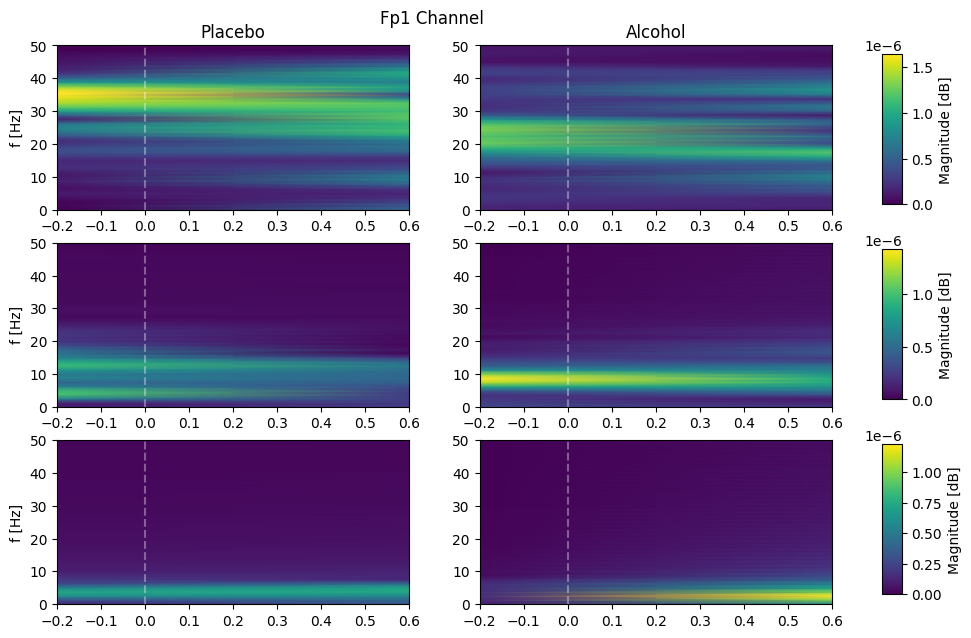

In [142]:
plot_stft_imfs(sample_rate, p_cimfs1, a_cimfs1, t, p_d1, a_d1, [0, 1, 2], [0, 1, 2], channels[1])